사용할 라이브러리 임포트

In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print("룰루~")

룰루~


os : Operating System \
urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)\
cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리\
numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리.\
pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리.\
pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리\
matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구

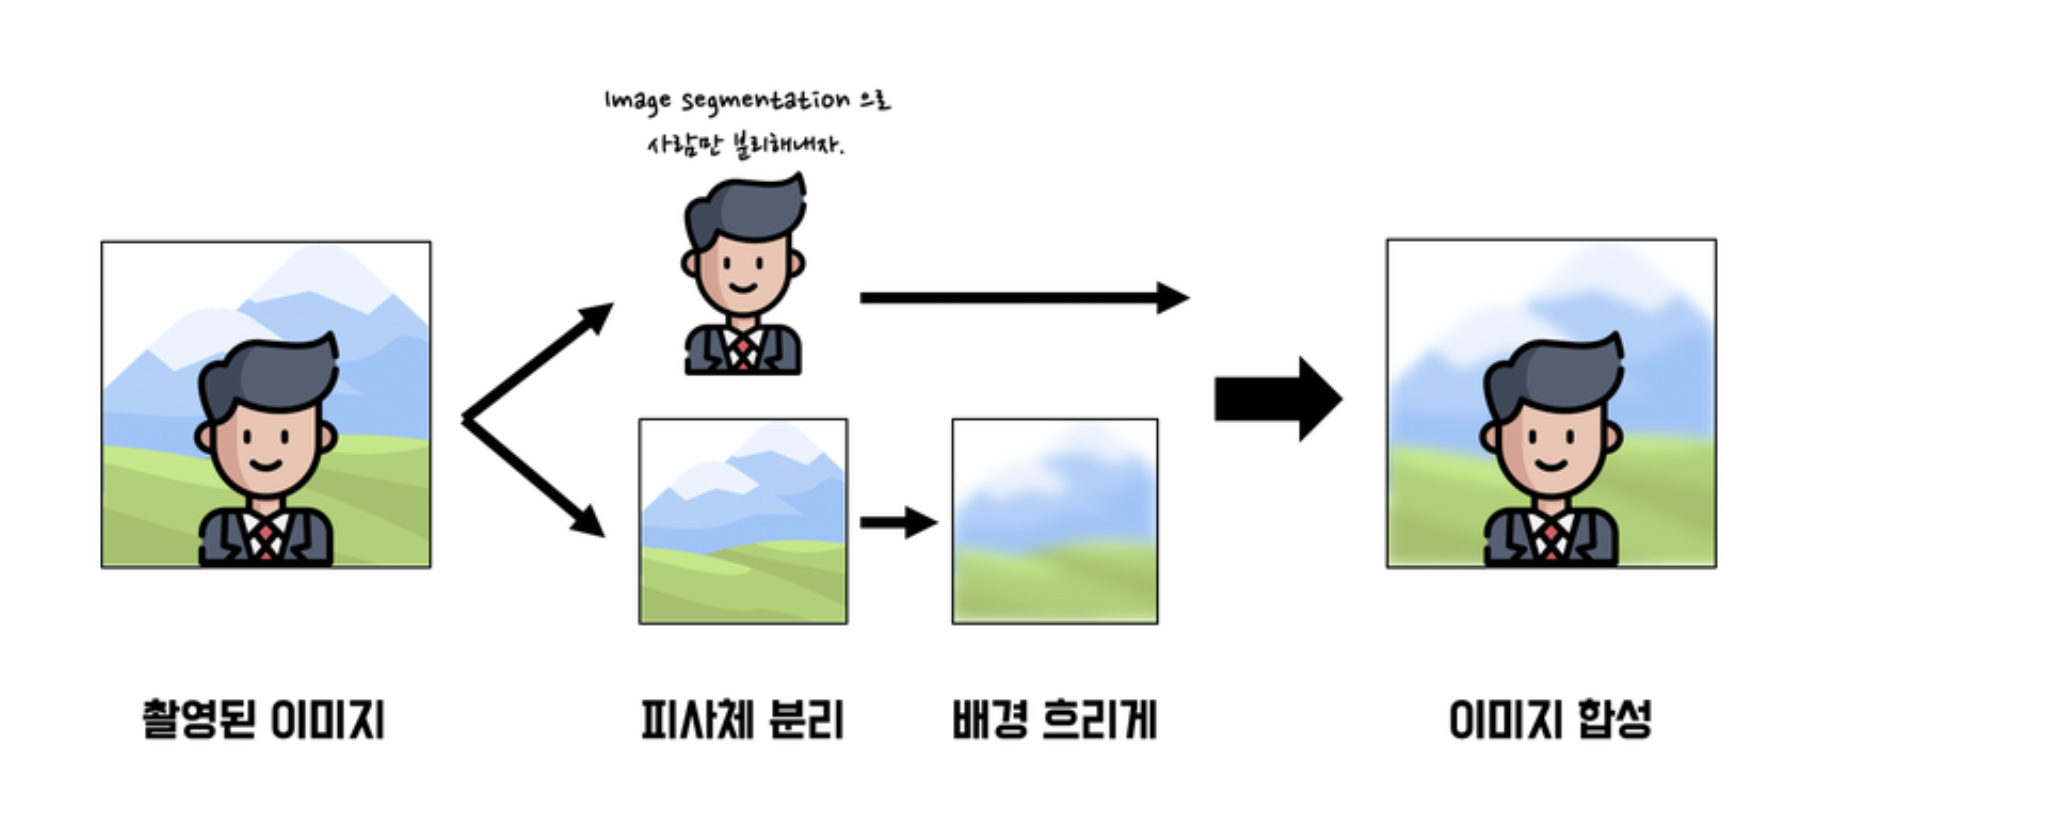

작업과정

# 셸로우 포커스 만들기 (1) 사진을 준비하자

In [3]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/person_motorbike.jpg'
img_orig = cv2.imread(img_path)

print(img_orig.shape)



(919, 736, 3)


사용할 input image의 shape(크기)는 (919, 736, 3) (세로길이, 가로길이, 3개의 색상채널)

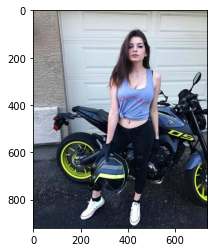

In [4]:
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

cv2가 BGR순서로 색상필터가 구성되어있어서 RGB로 바꾸어서 사용할 것!

# 셸로우 포커스 만들기 (2~3) 세그멘테이션으로 사람 분리하기

<br>
세그멘테이션 문제에는 FCN, SegNet, U-Net 등 많은 모델이 사용<br>
이번 프로젝트에서는 DeepLab이라는 세그멘테이션 모델을 이용
<br>

* DeepLab에 대한 자세한 설명\
https://blog.lunit.io/2018/07/02/deeplab-v3-encoder-decoder-with-atrous-separable-convolution-for-semantic-image-segmentation/
<br>
<br>
* PixelLib \
https://github.com/ayoolaolafenwa/PixelLib

In [5]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)
# urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fc9f3b8d2b0>)

깃허브 url에서 직접 모델을 가지고와서 디렉토리에 구성

In [6]:
model = semantic_segmentation()
#PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬

model.load_pascalvoc_model(model_file)
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [7]:
segvalues, output = model.segmentAsPascalvoc(img_path)
# segmentAsPascalvoc()함수를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

segmentAsPascalvoc라는 함수 이름에서 세그멘테이션 모델에 대한 힌트를 얻을 수 있는데요. \
PASCAL VOC 데이터로 학습된 모델을 이용한다는 의미입니다. \
모델마다 학습시킨 데이터에 따라 결괏값이 달라지므로 어떤 데이터를 학습시켰는지 확인하는 것은 매우 중요합니다.

* PASCAL VOC 
* http://host.robots.ox.ac.uk/pascal/VOC/

PASCAL VOC 데이터의 라벨 종류

In [8]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

### 만약 PASCAL VOC 데이터의 라벨 종류에 포함되어있지 않은 오브젝트가 사진에 있다면 어떻게 분류해주어야 할까....?

In [9]:
print(LABEL_NAMES[20])

tv


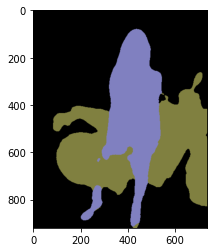

In [10]:
plt.imshow(output)
plt.show()

LABEL_NAMES 리스트에 오토바이와 사람이 포함되어있어 배경으로부터 분리해 줄 수 있었다.\
원본사진에서 사람이 헬멧을 들고있는데 헬멧은 오토바이로 분류된 것을 볼 수 있었다.\
helmet은 LABEL_NAMES에 포함되지 않은 사물인데, 어떻게 오토바이로 분류한 것일까?

In [11]:
segvalues

{'class_ids': array([ 0, 14, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

이미지에서 segvalues에 0, 14, 15 번째 데이터 레이블로 분류해주었다는 힌트를 얻음 class_ids': array([ 0, 14, 15])

In [12]:
output

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

segvalues, output = model.segmentAsPascalvoc(img_path) 의 결과값 

In [13]:
print(LABEL_NAMES[0], LABEL_NAMES[14], LABEL_NAMES[15])

background motorbike person


segvalues를 찍은 값에서 클래스 아이디가 LABEL_NAMES 리스트의 0, 14, 15번째 값이었다.\
사진에서 본 배경, 오토바이, 사람 이었다.

In [14]:
output

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [15]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
motorbike
person


각 클래스 레이블마다 다른 색상으로 분류된 것을 확인할 수 있었고 이 이미지는 배경, 오토바이, 사람으로 분류되어 이미지가 세가지 색상으로 나뉘어 출력된 것을 이해하였다.

In [16]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!


#컬러맵 만들기
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |=((ind >> channel) & 1) << shift
    ind >>= 3
    
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [17]:
colormap[15]

array([192, 128, 128])

colormap[15] 는 클래스레이블에서 15번째인 person으로, 인물의 컬러맵이 array([192, 128, 128])으로 지정되었다.

In [18]:
colormap[14]

array([ 64, 128, 128])

colormap[14] 는 클래스레이블에서 14번째인 motorbike으로, 인물의 컬러맵이 array([64, 128, 128])으로 지정되었다.

In [19]:
colormap[0]

array([0, 0, 0])

colormap[0] 는 클래스레이블에서 1번째인 background으로, 인물의 컬러맵이 array([0, 0, 0])으로 지정되었다.

In [20]:
seg_color = (128, 128, 192)

bgr2rgb를 직접 바꾼 코드

(919, 736)


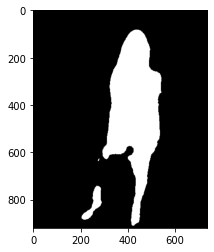

In [21]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함

seg_map = np.all(output == seg_color, axis = -1)  # np.all(조건) - 배열의 모든 데이터가 조건과 맞으면 True 하나라도 다르면 False
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

seg_map.shape에서 (919, 736)이 나온 것으로 보아 원래는 (919, 736, 3)이었는데 3개의 색상필터가 삭제된 것을 확인했다.

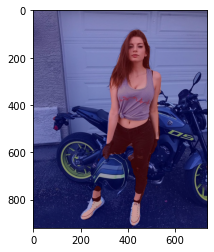

In [22]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy() #원본 이미지의 카피 이미지


# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255 #사람부분 영역 0~255 숫자는 각기다른 0~255 색상을 의미

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)


# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
                            #img_show는 원본이미지, color_mask는 아래 결과물로 덧입힌 색상, 두 이미지를 섞는 비율

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

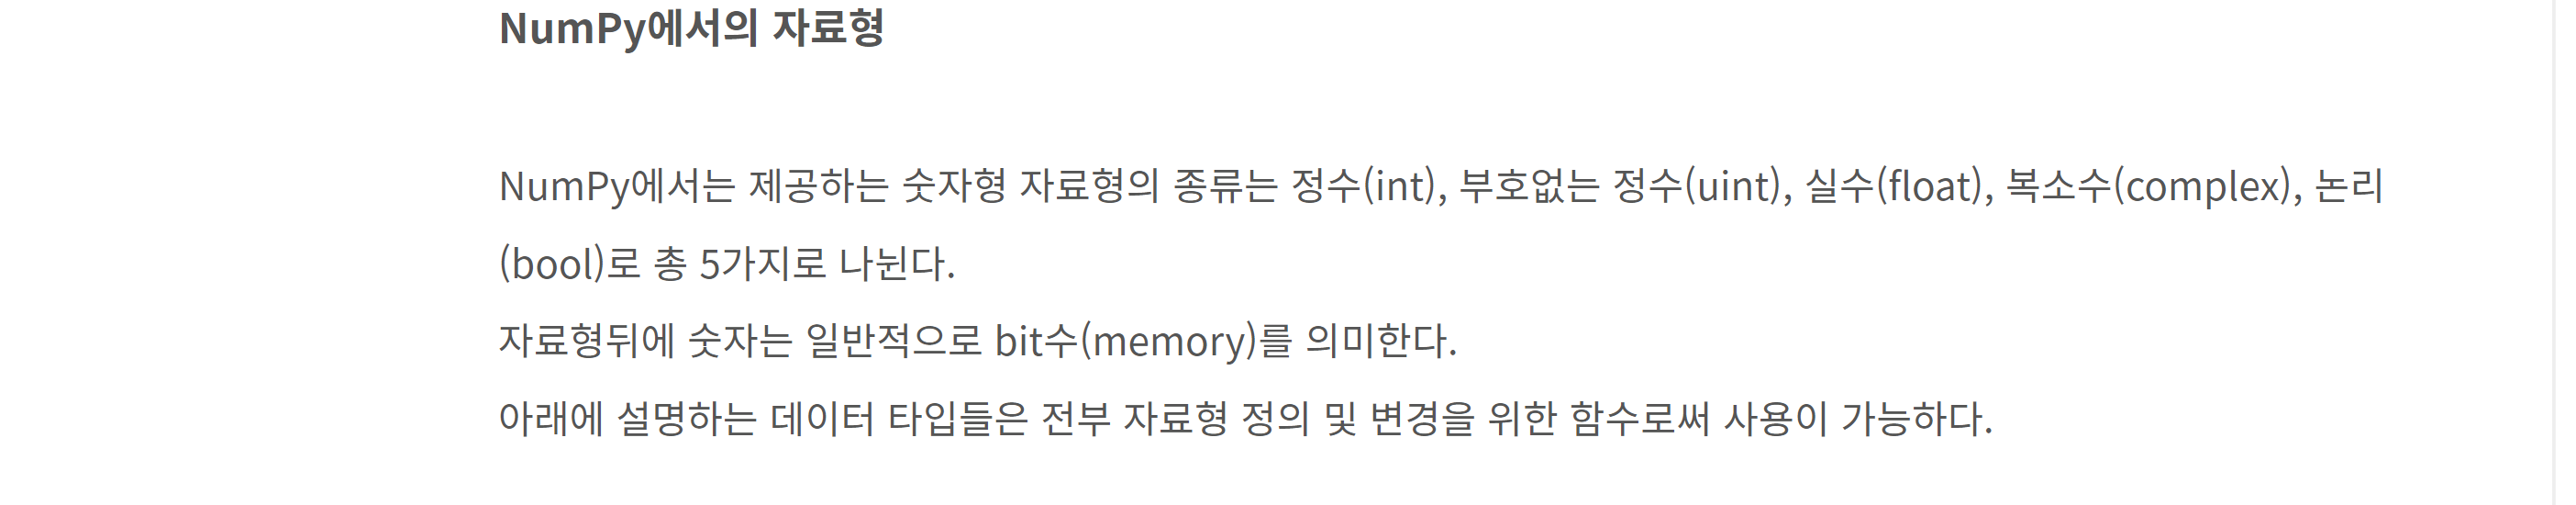
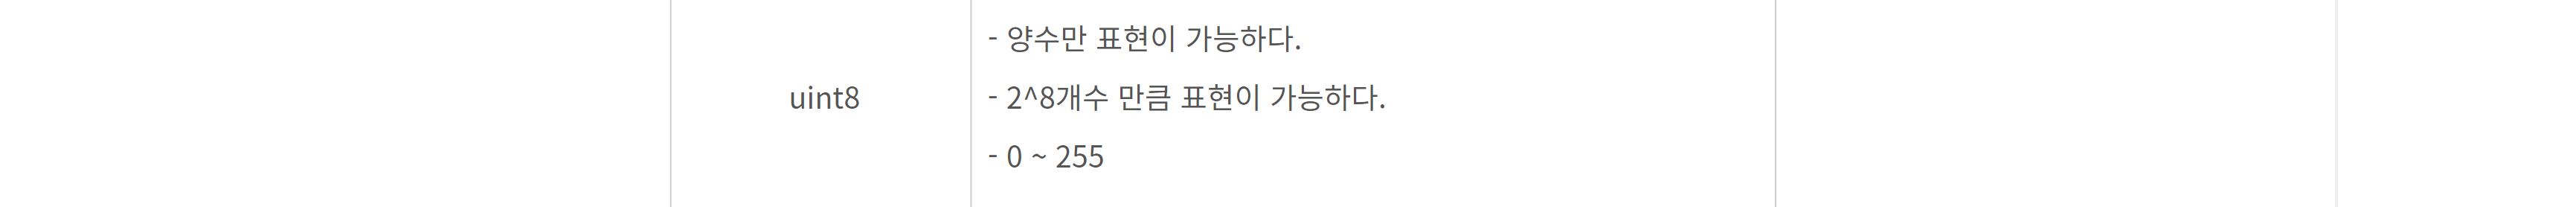
https://kongdols-room.tistory.com/53

# 셸로우 포커스 만들기 (4) 배경 흐리게 하기

배경을 흐리게 - blur()함수 이용

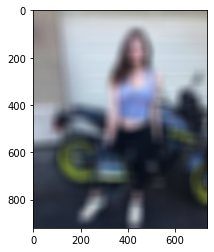

In [23]:
img_orig_blur = cv2.blur(img_orig, (50, 50)) # blurring kernel size 숫자가 커질수록 더 뿌연 결과물을 얻을 수 있다.


# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_orig_blur 의 결과

흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출

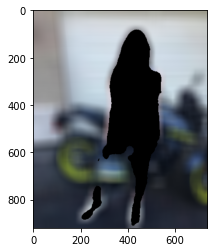

In [24]:
#cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

* 이미지 비트 연산
* https://copycoding.tistory.com/156

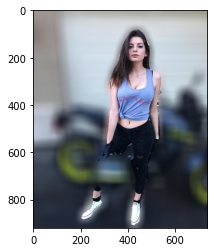

In [25]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.

img_concat = np.where(img_mask_color == 255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 아닌 영역은 블러된 이미지 값을 사용합니다.\
np.where(조건, 참일때, 거짓일때)의 형식의 코드를 사용했네요.

https://numpy.org/doc/stable/reference/generated/numpy.where.html

# 동물사진 분리하기

In [26]:
img_path_ani = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_dogs.jpg'
img_orig_ani = cv2.imread(img_path_ani)

print(img_orig_ani.shape)

(415, 542, 3)


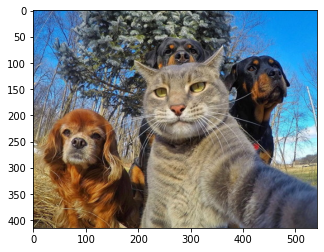

In [27]:
plt.imshow(cv2.cvtColor(img_orig_ani, cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
segvalues_ani, output_ani = model.segmentAsPascalvoc(img_path_ani)

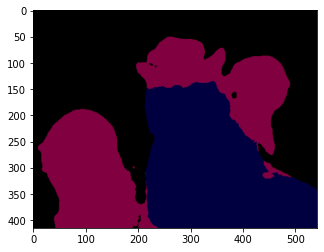

In [29]:
plt.imshow(output_ani)
plt.show()

클래스 레이블에 cat과 dog가 있는 것을 확인하고, 일부러 개와 고양이가 함께 나와있는 사진을 준비하였다.\
개와 고양이 실루엣을 잘 감지해주는 것을 확인하였다.

In [30]:
segvalues_ani

{'class_ids': array([ 0,  8, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [31]:
for class_id in segvalues_ani['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
dog


In [32]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |=((ind >> channel) & 1) << shift
    ind >>= 3
    
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [33]:
colormap[8] #고양이 컬러맵

array([64,  0,  0])

In [34]:
colormap[12] # 강아지 컬러맵

array([ 64,   0, 128])

In [35]:
seg_color_cat = (0, 0, 64)

In [36]:
seg_color_dog = (128, 0, 64)

(415, 542)


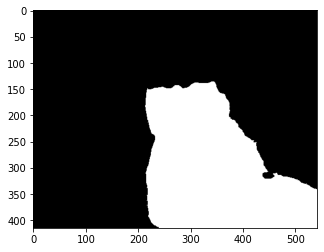

In [37]:
seg_map_cat = np.all(output_ani == seg_color_cat, axis = -1)
print(seg_map_cat.shape)
plt.imshow(seg_map_cat, cmap='gray')
plt.show()

(415, 542)


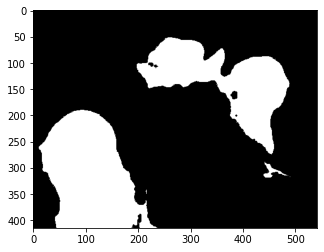

In [38]:
seg_map_dog = np.all(output_ani == seg_color_dog, axis = -1)
print(seg_map_dog.shape)
plt.imshow(seg_map_dog, cmap='gray')
plt.show()

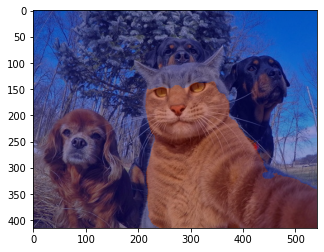

In [63]:
img_show_cat = img_orig_ani.copy()

img_mask_cat = seg_map_cat.astype(np.uint8) * 255

color_mask_cat = cv2.applyColorMap(img_mask_cat, cv2.COLORMAP_JET)

img_show_cat = cv2.addWeighted(img_show_cat, 0.6, color_mask_cat, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_cat, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img_orig_ani_blur = cv2.blur(img_orig_ani, (30, 30))

plt.imshow(cv2.cvtColor(img_orig_ani_blur, cv2.COLOR_BGR2RGB))
plt.show()

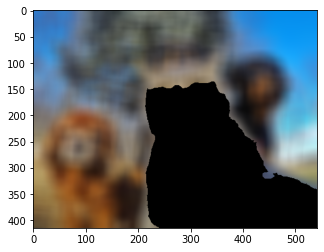

In [66]:
img_mask_color_cat = cv2.cvtColor(img_mask_cat, cv2.COLOR_GRAY2BGR)

img_bg_mask_cat = cv2.bitwise_not(img_mask_color_cat)

img_bg_blur_cat = cv2.bitwise_and(img_orig_ani_blur, img_bg_mask_cat)
plt.imshow(cv2.cvtColor(img_bg_blur_cat, cv2.COLOR_BGR2RGB))
plt.show()

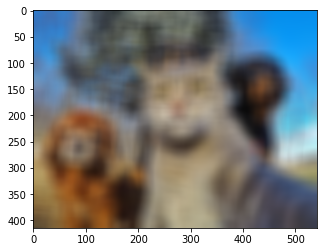

In [67]:
img_concat_cat = np.where(img_mask_color_cat == 255, img_orig_ani_blur, img_bg_blur_cat)
plt.imshow(cv2.cvtColor(img_concat_cat, cv2.COLOR_BGR2RGB))
plt.show()

In [43]:
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/iu.jpg'
img_orig2 = cv2.imread(img_path2)

print(img_orig2.shape)


(1024, 1024, 3)


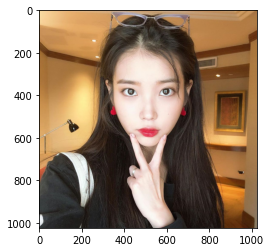

In [44]:
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.show()

In [45]:
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)

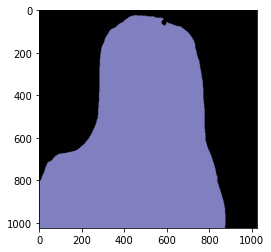

In [46]:
plt.imshow(output2)
plt.show()

In [47]:
segvalues2

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]])}

In [48]:
output2

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[128, 128, 192],
        [128, 128, 192],
        [128, 128, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[128, 128, 192],
        [128, 128, 192],
        [128, 128, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[128, 128, 192],
        [128, 128, 192],
        [128, 128, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [49]:
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [54]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |=((ind >> channel) & 1) << shift
    ind >>= 3
    
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [55]:
colormap[15]

array([192, 128, 128])

In [57]:
seg_color2 = (128, 128, 192)

(1024, 1024)


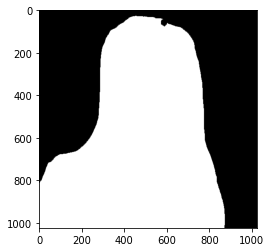

In [58]:
seg_map = np.all(output2 == seg_color2, axis = -1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

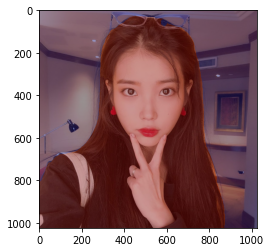

In [59]:
img_show2 = img_orig2.copy()

img_mask2 = seg_map.astype(np.uint8) * 255

color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)

img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

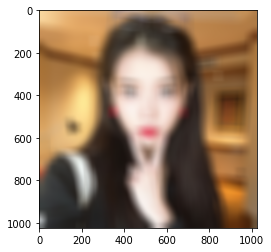

In [60]:
img_orig_blur2 = cv2.blur(img_orig2, (50, 50))

plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))
plt.show()

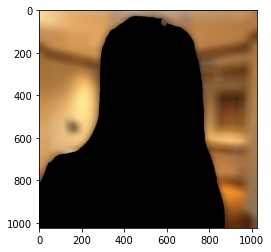

In [61]:
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)

img_bg_mask2 = cv2.bitwise_not(img_mask_color2)

img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask2)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()

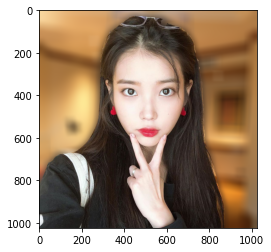

In [62]:
img_concat2 = np.where(img_mask_color2 == 255, img_orig2, img_bg_blur2)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

아이유 사진으로 실행해본 결과 머리 위에 안경까지 잡아줄 수 있다면 좀 더 자연스럽지 않았을까? 하는 생각이 들었다.\
안경이 class 레이블에 포함되어있지 않아서 잡아주지 못했던 것일까..?

문제점
<br>
* 클래스 레이블에 포함되지 않는 오브젝트가 이미지에 있는 경우
* 인물 사진을 분류를 목적으로 할 때 무언가 들고있는 경우 이미지 분류를 잘 해내지 못했다.